# Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

## Basic Imports

In [43]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models
import numpy as np

## 3.1 Preprocessing for Topic Modeling

We load the dataset, apply spaCy to tokenize and lemmatize text, and construct a list of lemma tokens for each document. Stop words, punctuation, and whitespace tokens are removed to prepare clean inputs for topic modeling.

In [44]:
nlp = spacy.load("en_core_web_sm")
sou = pd.read_csv("data/SOTU.csv")

def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

processed_docs = sou['Text'].apply(preprocess_text)

## 3.2 LDA Topic Modeling

We construct a dictionary and bag-of-words corpus from the lemma lists.
Using Gensim’s LDA model, we extract a set of topics from the entire SOTU speech collection.

In [45]:
dictionary = Dictionary(processed_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=18, random_state=42, passes=10)

lda_topics = lda.print_topics(num_words=10)
print("---LDA Topics---")
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")

---LDA Topics---
Topic: 0 
Words: 0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"

Topic: 1 
Words: 0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"

Topic: 2 
Words: 0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"

Topic: 3 
Words: 0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"

Topic: 4 
Words: 0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"

Topic: 5 
Word

In [46]:
# print the topic distribution for the first speech
first_doc_bow = corpus[0]
first_doc_topics = lda.get_document_topics(first_doc_bow)

print(first_doc_topics)

[(7, np.float32(0.99942654))]


In [47]:
pyLDAvis.enable_notebook()

lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124490 -0.021460       1        1  25.618865
6     -0.177721  0.042077       2        1  19.985555
5      0.215260  0.071386       3        1   9.897830
7      0.135347 -0.070053       4        1   9.755686
8     -0.048065 -0.119211       5        1   7.285634
17    -0.174387  0.056450       6        1   5.731789
13    -0.173280  0.057692       7        1   5.118534
9     -0.065566 -0.065617       8        1   3.674214
11     0.221114  0.096518       9        1   3.313790
12     0.108985 -0.107040      10        1   3.209760
4      0.170987 -0.059934      11        1   2.417563
3     -0.048335 -0.061174      12        1   1.964851
1      0.001805 -0.137938      13        1   1.024339
14     0.149811  0.117592      14        1   0.773147
15    -0.097709  0.071397      15        1   0.174832
2     -0.030759  0.033480      16        1   0.045779
10    -0.027617  0.048256      17        1   0.003916
16    -0.035383  0.047579      18        1   0.003916, topic_info=           Term         Freq        Total Category  logprob  loglift
509     program  1272.000000  1272.000000  Default  30.0000  30.0000
978      mexico   852.000000   852.000000  Default  29.0000  29.0000
31    americans   990.000000   990.000000  Default  28.0000  28.0000
5330    article   492.000000   492.000000  Default  27.0000  27.0000
666     tonight   666.000000   666.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3221     method     0.007818   526.091598  Topic18  -7.4658  -0.9690
664       today     0.007947   576.799945  Topic18  -7.4494  -1.0446
1148    appoint     0.007382   419.009025  Topic18  -7.5231  -0.7987
31    americans     0.008294   990.446257  Topic18  -7.4067  -1.5426
2624       cent     0.007440   614.024230  Topic18  -7.5154  -1.1731

[1282 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4847      4  0.881725  --the
4847      8  0.080157  --the
3170      1  0.132801   11th
3170      2  0.079680   11th
3170      6  0.292162   11th
...     ...       ...    ...
744       9  0.116620  young
744      10  0.003239  young
744      11  0.016197  young
744      12  0.009718  young
744      14  0.009718  young

[5615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 8, 9, 18, 14, 10, 12, 13, 5, 4, 2, 15, 16, 3, 11, 17])

## LDA Topic Interpretation

The LDA topics generally capture high-frequency, surface-level themes in the corpus.
Common words such as government, year, world, nation, states, congress appear across many topics, showing that LDA groups speeches based on repeated vocabulary patterns rather than semantic meaning.
Because SOTU speeches share strong stylistic overlap, the LDA topics tend to be broad and partially overlapping.

## 3.3 BERTopic Modeling

We further apply BERTopic, which uses transformer embeddings and density-based clustering to form semantically coherent clusters.

In [48]:
docs = sou["Text"].to_list()

In [49]:
import umap

umap_model = umap.UMAP(random_state=42)

topic_model = BERTopic(min_topic_size=3, umap_model=umap_model, calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs)

vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [50]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,73,-1_government_states_congress_year,"[government, states, congress, year, united, p...",[\nTo the Senate and House of Representatives:...
1,0,22,0_states_government_united_congress,"[states, government, united, congress, public,...",[\nFellow-Citizens of the Senate and of the Ho...
2,1,15,1_states_government_united_congress,"[states, government, united, congress, departm...",[\nFellow-Citizens of the Senate and House of ...
3,2,13,2_america_world_new_years,"[america, world, new, years, american, people,...","[\nMr. Speaker, Mr. President, my colleagues i..."
4,3,12,3_states_government_united_congress,"[states, government, united, congress, public,...",[\nFellow-Citizens of the Senate and of the Ho...
5,4,11,4_world_new_economic_program,"[world, new, economic, program, federal, years...","[\nMr. President, Mr. Speaker, Members of the ..."
6,5,11,5_world_nations_soviet_peace,"[world, nations, soviet, peace, economic, nati...","[\nMr. President, Mr. Speaker, Members of the ..."
7,6,9,6_government_states_law_united,"[government, states, law, united, congress, go...",[\nTo the Senate and House of Representatives:...
8,7,9,7_government_great_work_law,"[government, great, work, law, public, nationa...",[\nTo the Senate and House of Representatives:...
9,8,7,8_states_united_government_constitution,"[states, united, government, constitution, con...",[\nTo the Senate and House of Representatives:...


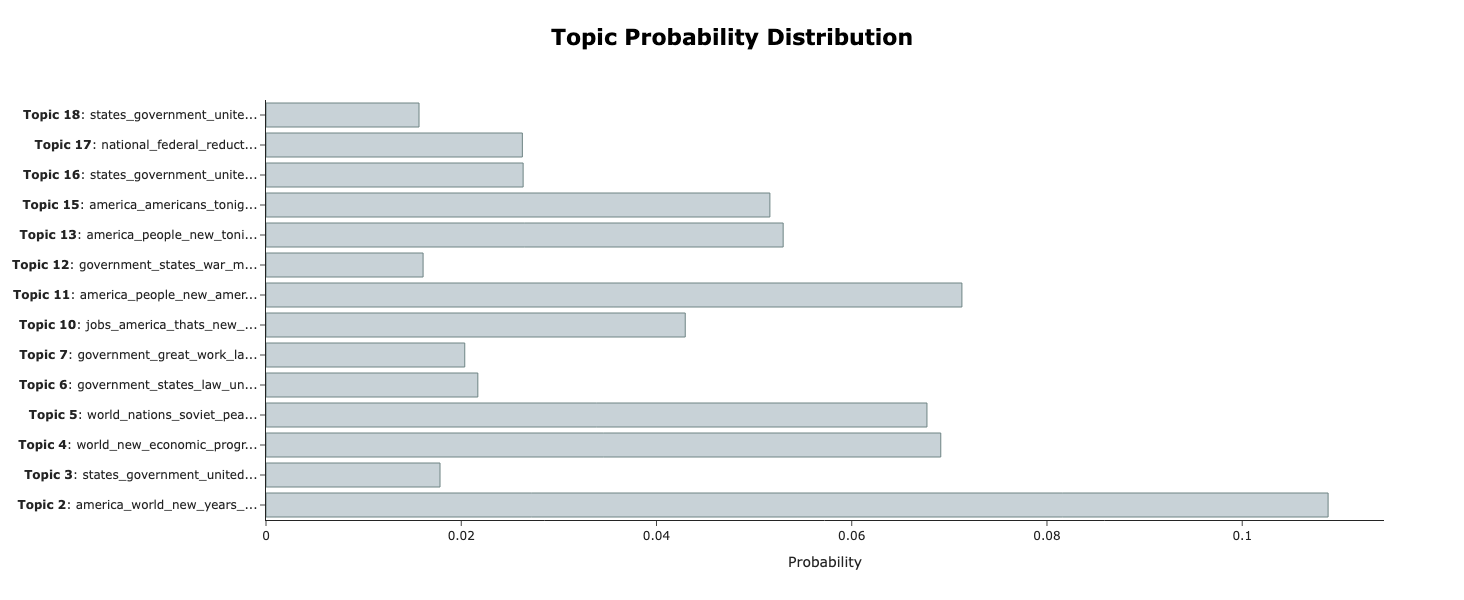

In [59]:
first_probs = probs[0]
topic_model.visualize_distribution(first_probs)

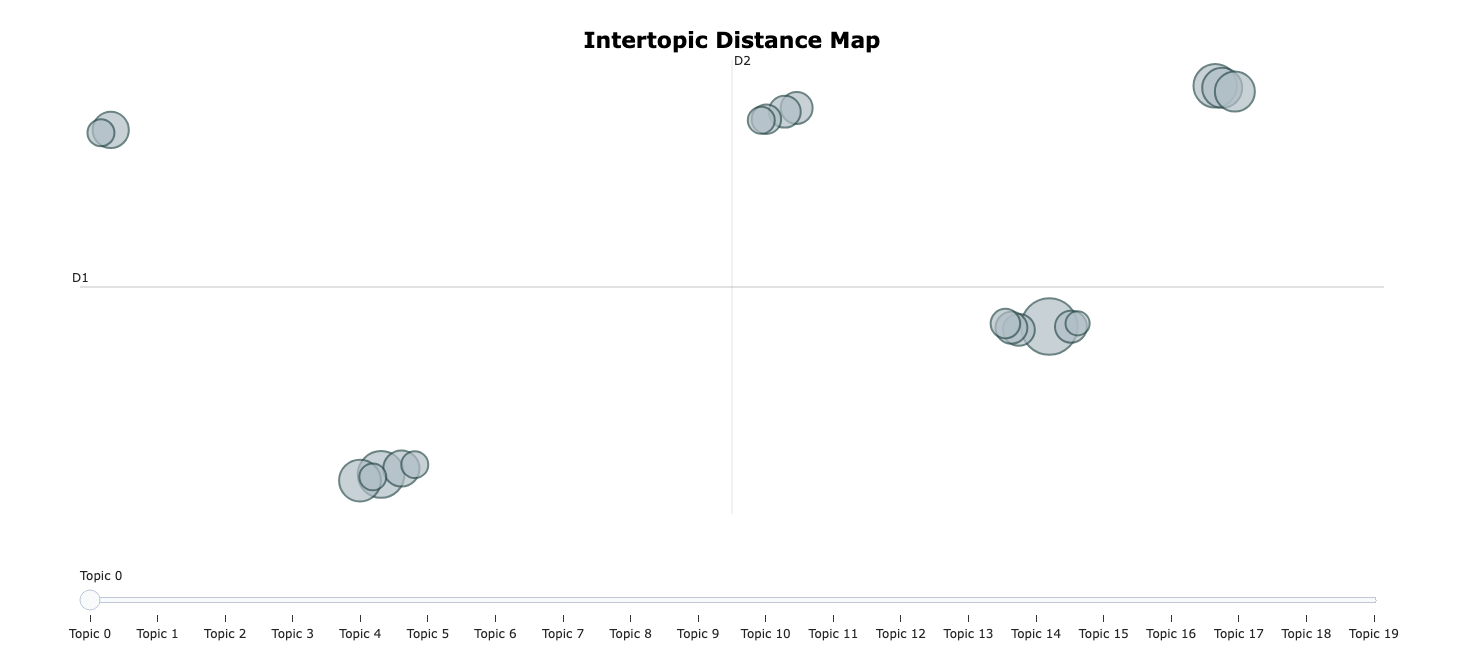

In [57]:
topic_model.visualize_topics()

## BERTopic Topic Interpretation

BERTopic typically produces fewer, more semantically distinct topics.
Because transformer embeddings capture contextual meaning, the model groups speeches into broader conceptual clusters such as:

- Government/Congress/National Affairs

- America/People/World/Future Themes

This reflects semantic coherence, contrasting with LDA’s frequency-driven clustering.

## 3.4 Comparison: LDA vs BERTopic

- LDA uses a bag-of-words representation and identifies topics based on word co-occurrence.
   <br>→ Produces several overlapping topics with similar vocabulary.

- BERTopic uses sentence-level semantic embeddings from transformers.
   <br>→ Produces fewer, but more meaningful and interpretable clusters.

- Since SOTU speeches share structure and vocabulary,
   <br>→ LDA tends to fragment content into many similar topics,
   <br>→ BERTopic groups documents by broader themes reflecting actual meaning.

Overall, BERTopic provides more coherent high-level topics, while LDA gives granular but noisy lexical clusters.